#### Ridge Regression (interpretation)

In this notebook, we will run ridge regression multiple times with different L2 penalties to see which one produces the best fit. We will revisit the example of polynomial regression as a means to see the effect of L2 regularization. In particular, we will:
* Use a pre-built implementation of regression (sklearn) to run polynomial regression
* Use matplotlib to visualize polynomial regressions
* Use a pre-built implementation of regression (sklearn) to run polynomial regression, this time with L2 penalty
* Use matplotlib to visualize polynomial regressions under L2 regularization
* Choose best L2 penalty using cross-validation.
* Assess the final fit using test data.

We will continue to use the House data from previous notebooks.  (In the next programming assignment for this module, you will implement your own ridge regression learning algorithm using gradient descent.)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from scipy import stats

import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [2]:
def polynomial_dataframe(feature, degree):
    # assume that degree >= 1
    # initialize the SFrame:
    poly_df = pd.DataFrame()
    # and set poly_sframe['power_1'] equal to the passed feature
    poly_df['power_1'] = feature
    # first check if degree > 1
    if degree > 1:
        # then loop over the remaining degrees:
        # range usually starts at 0 and stops at the endpoint - 1. We want it to start at 2 and stop at degree
        for power in range(2, degree + 1): 
            # first we'll give the column a name:
            name = 'power_' + str(power)
            # then assign poly_sframe[name] to the appropriate power of feature
            poly_df[name] = feature ** power
    return poly_df
# test it
tmp = pd.Series([1., 2., 3.])
print(polynomial_dataframe(tmp, 3))

   power_1  power_2  power_3
0      1.0      1.0      1.0
1      2.0      4.0      8.0
2      3.0      9.0     27.0


In [3]:
def get_residual_sum_of_squares(model, data, outcome):
    # First get the predictions
    predictions = model.predict(data)    
    # Then compute the residuals/errors
    RSS = outcome-predictions
    # Then square and add them up
    RSS = (RSS*RSS).sum()

    return(RSS)    

In [4]:
# load data
sales = pd.read_csv("../../ML Data & Script/kc_house_data.csv")
sales.head()

# sort by sqft_living and price (for plotting purposes)
sales = sales.sort_values(by=['sqft_living', 'price'])

In [5]:
# degree 15 polynomial
X = polynomial_dataframe(sales['sqft_living'], 15)
Y = sales['price']
model15_sk = Ridge(alpha=1e-5, fit_intercept=True) 
model15_sk.fit(X, Y)

print("Intercept: ", model15_sk.intercept_,"\n")
print("Cofficents: \n", [str(k) + " : " + str(v) for k, v in zip(X.columns, model15_sk.coef_)])

print("R2: ", model15_sk.score(X, Y))

Intercept:  226344.86177182972 

Cofficents: 
 ['power_1 : 72.19243122300817', 'power_2 : 0.012878455043624877', 'power_3 : 8.797294403343057e-06', 'power_4 : -6.342164154452673e-10', 'power_5 : -1.9387025859221974e-14', 'power_6 : -1.5685204645873023e-16', 'power_7 : -4.595494236423518e-16', 'power_8 : 3.42171230642156e-16', 'power_9 : -1.9901778237605541e-16', 'power_10 : -2.503319359322117e-16', 'power_11 : 2.1963769224640284e-16', 'power_12 : 6.748668926503038e-16', 'power_13 : 4.482694624019528e-16', 'power_14 : -4.083618615304315e-16', 'power_15 : 6.674691448678407e-17']
R2:  0.5423061907812543


### Observe Overfitting

In [6]:
# randomize data
sales = sales.sample(frac=1,random_state=5)
amount = sales.shape[0] // 4
# create the four sets
set_1 = sales[0:amount * 1].sort_values(by=['sqft_living', 'price'])
set_2 = sales[amount * 1:amount * 2].sort_values(by=['sqft_living', 'price'])
set_3 = sales[amount * 2:amount * 3].sort_values(by=['sqft_living', 'price'])
set_4 = sales[amount * 3:].sort_values(by=['sqft_living', 'price'])

In [7]:
def get_model(dataset, alpha_reg):
    X = polynomial_dataframe(dataset['sqft_living'], 15)
    Y = dataset['price']
    # using sag shows more variance
    model = Ridge(alpha=alpha_reg, fit_intercept=True) 
    model.fit(X, Y)
    coefficients = ["intercept:" + str(model.intercept_)] + [str(k) + " : " + str(v) for k, v in zip(X.columns, model.coef_)]
    return X, Y, model, coefficients

set1_X, set1_Y, set1_model, coff1 = get_model(set_1, 1e-5)
set2_X, set2_Y, set2_model, coff2 = get_model(set_2, 1e-5)
set3_X, set3_Y, set3_model, coff3 = get_model(set_3, 1e-5)
set4_X, set4_Y, set4_model, coff4 = get_model(set_4, 1e-5)

In [8]:
def print_coffients(coff):
    for c in coff:
        print(c)
    print("\n")

intercept:194678.8167319036
power_1 : 182.10558910027297
power_2 : -0.08293020257765639
power_3 : 3.756673456144952e-05
power_4 : -3.1725025408493264e-09
power_5 : -4.199929100075716e-14
power_6 : -1.5107027396271854e-16
power_7 : -3.436118727656908e-16
power_8 : 2.6905852032955926e-16
power_9 : -1.695080624829632e-17
power_10 : -1.7768415766320435e-16
power_11 : -3.923254504078504e-16
power_12 : 1.6667646740165307e-15
power_13 : 9.64701079922433e-16
power_14 : 5.698058442591486e-16
power_15 : -4.810341249325294e-16


intercept:297178.1122814853
power_1 : -51.48773284906751
power_2 : 0.0809539386615715
power_3 : -5.326758269636298e-06
power_4 : 2.687193891273251e-10
power_5 : -9.321211454432473e-15
power_6 : 9.902146763074251e-17
power_7 : -1.0701150129914793e-15
power_8 : 2.0091442729945135e-16
power_9 : 1.7203593271659645e-16
power_10 : -1.385485610581704e-15
power_11 : -5.519048665606278e-18
power_12 : 7.33798560324673e-16
power_13 : -1.0157010867291822e-16
power_14 : -4.71546118657

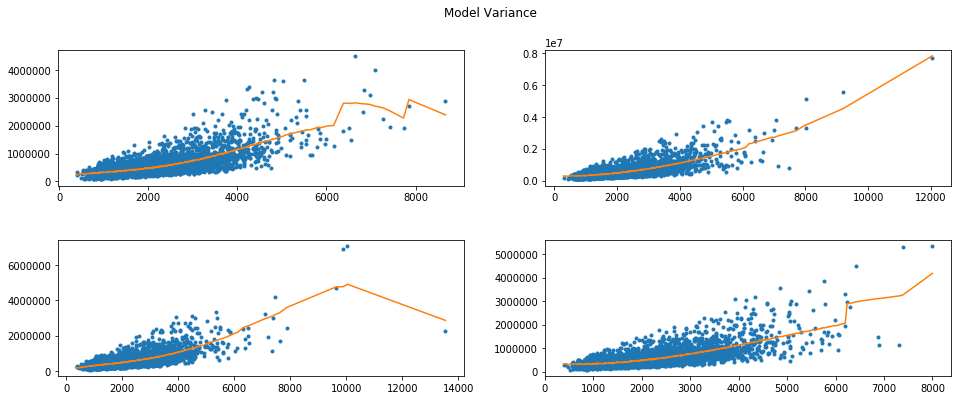

In [9]:
print_coffients(coff1)
print_coffients(coff2)
print_coffients(coff3)
print_coffients(coff4)


def plotIt(X, Y, model):
    plt.plot(X['power_1'], Y,'.',
             X['power_1'], model.predict(X),'-')
    
fig = plt.figure(figsize=(16,6))
fig.subplots_adjust(hspace = 0.4, wspace = 0.2)
fig.suptitle("Model Variance")
fig.add_subplot(221)
plotIt(set1_X, set1_Y, set1_model)
fig.add_subplot(222)
plotIt(set2_X, set2_Y, set2_model)
fig.add_subplot(223)
plotIt(set3_X, set3_Y, set3_model)
fig.add_subplot(224)
plotIt(set4_X, set4_Y, set4_model)


Look at the cofficients of power1. Most of them are in the 100s

### Ridge regression comes to rescue

intercept:310234.25719953864
power_1 : 0.21048751951736355
power_2 : 0.008742324388951981
power_3 : 1.9729728704365065e-05
power_4 : -2.0351347815501646e-09
power_5 : -3.913900054193146e-14
power_6 : -1.517921038645508e-16
power_7 : -4.40923420674662e-16
power_8 : 2.7586783174694143e-16
power_9 : -4.819852287858883e-17
power_10 : -1.6337518392970043e-16
power_11 : -5.327211531903917e-16
power_12 : 1.7326810055742432e-15
power_13 : 1.0151282504550054e-15
power_14 : 5.769508456025654e-16
power_15 : -4.3676595892481496e-16


intercept:259861.7471019099
power_1 : -0.1302732121932745
power_2 : 0.059514587641548045
power_3 : -2.1272680599769947e-06
power_4 : 1.220076178785289e-10
power_5 : -7.410353869547933e-15
power_6 : 1.51032536108965e-16
power_7 : -1.0410197405670728e-15
power_8 : 2.0431627334536801e-16
power_9 : 1.7437580086727348e-16
power_10 : -1.3896500486075167e-15
power_11 : 6.246059809434568e-17
power_12 : 7.114560057087718e-16
power_13 : -8.337643420482978e-17
power_14 : -6.0036

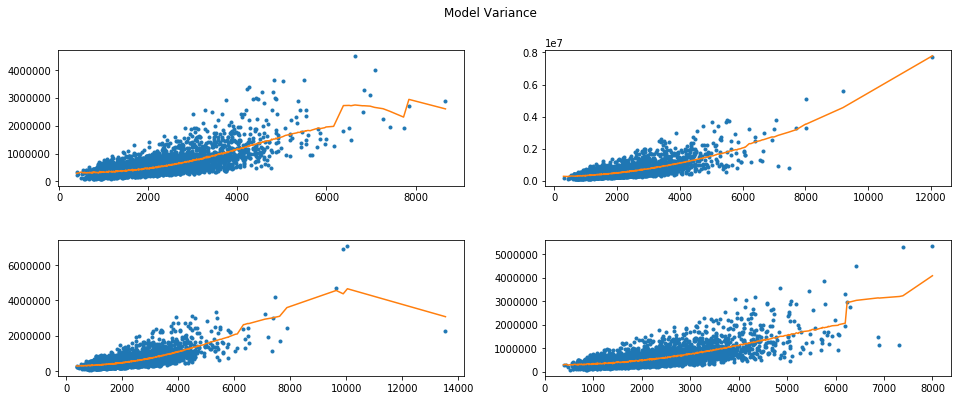

In [10]:
set1_X, set1_Y, set1_model, coff1 = get_model(set_1, 1e10)
set2_X, set2_Y, set2_model, coff2 = get_model(set_2, 1e10)
set3_X, set3_Y, set3_model, coff3 = get_model(set_3, 1e10)
set4_X, set4_Y, set4_model, coff4 = get_model(set_4, 1e10)

print_coffients(coff1)
print_coffients(coff2)
print_coffients(coff3)
print_coffients(coff4)


def plotIt(X, Y, model):
    plt.plot(X['power_1'], Y,'.',
             X['power_1'], model.predict(X),'-')
    
fig = plt.figure(figsize=(16,6))
fig.subplots_adjust(hspace = 0.4, wspace = 0.2)
fig.suptitle("Model Variance")
fig.add_subplot(221)
plotIt(set1_X, set1_Y, set1_model)
fig.add_subplot(222)
plotIt(set2_X, set2_Y, set2_model)
fig.add_subplot(223)
plotIt(set3_X, set3_Y, set3_model)
fig.add_subplot(224)
plotIt(set4_X, set4_Y, set4_model)

### Selecting an L2 penalty via cross-validation

Just like the polynomial degree, the L2 penalty is a "magic" parameter we need to select. We could use the validation set approach as we did in the last module, but that approach has a major disadvantage: it leaves fewer observations available for training. **Cross-validation** seeks to overcome this issue by using all of the training set in a smart way.

We will implement a kind of cross-validation called **k-fold cross-validation**. The method gets its name because it involves dividing the training set into k segments of roughtly equal size. Similar to the validation set method, we measure the validation error with one of the segments designated as the validation set. The major difference is that we repeat the process k times as follows:

Set aside segment 0 as the validation set, and fit a model on rest of data, and evalutate it on this validation set<br>
Set aside segment 1 as the validation set, and fit a model on rest of data, and evalutate it on this validation set<br>
...<br>
Set aside segment k-1 as the validation set, and fit a model on rest of data, and evalutate it on this validation set

After this process, we compute the average of the k validation errors, and use it as an estimate of the generalization error. Notice that  all observations are used for both training and validation, as we iterate over segments of data. 

To estimate the generalization error well, it is crucial to shuffle the training data before dividing them into segments. We reserve 10% of the data as the test set and shuffle the remainder.

In [11]:
from sklearn.model_selection import train_test_split
X = sales['sqft_living']
y = sales['price']
# obtain 10% test data and remaining 90%
X_train_valid, X_test, y_train_valid, y_test = train_test_split(X, y, train_size = 0.9 , test_size=0.1, shuffle=True, random_state=5)
X_train_valid.head()

4312     1520
15435    1760
13700    4500
16580    4250
1620     1070
Name: sqft_living, dtype: int64

In [12]:
print("whole data: ", len(sales))
print("90% ", len(sales) * 0.9)

whole data:  21613
90%  19451.7


In [13]:
# 10-fold cross-validation
n = int(len(sales) * 0.9)
k = 10 
for i in range(k):
    start = (n * i) // k
    end = (n * (i + 1)) // k - 1
    print (i, (start, end))

0 (0, 1944)
1 (1945, 3889)
2 (3890, 5834)
3 (5835, 7779)
4 (7780, 9724)
5 (9725, 11669)
6 (11670, 13614)
7 (13615, 15559)
8 (15560, 17504)
9 (17505, 19450)


### KFold Cross Validation

In [14]:
# perfrom k-fold cross validation on training-validation set
def k_fold_cross_validation(k, l2_penalty, X, y):
    errors = []
    for i in range(k):
        #Compute starting and ending indices of segment i and call 'start' and 'end'
        start = (n * i) // k
        end = (n * (i + 1)) // k - 1
        #Form validation set by taking a slice (start:end+1) from the data.
        X_val = X[start:end+1]  
        y_val = y[start:end+1]
        #Form training set by appending slice (end+1:n) to the end of slice (0:start).
        X_train = X[0:start].append(X[end+1:n])
        y_train = y[0:start].append(y[end+1:n])
        #Train a linear model using training set just formed, with a given l2_penalty
        model = Ridge(alpha=l2_penalty, fit_intercept=True) 
        model.fit(X_train, y_train)
        #Compute validation error using validation set just formed
        error = get_residual_sum_of_squares(model, X_val, y_val)
        errors.append(error)
    #print(np.mean(errors))
    return np.mean(errors)

Once we have a function to compute the average validation error for a model, we can write a loop to find the model that minimizes the average validation error. Write a loop that does the following:
* We will again be aiming to fit a 15th-order polynomial model using the `sqft_living` input
* For `l2_penalty` in [10^1, 10^1.5, 10^2, 10^2.5, ..., 10^7] (to get this in Python, you can use this Numpy function: `np.logspace(1, 7, num=13)`.)
    * Run 10-fold cross-validation with `l2_penalty`
* Report which L2 penalty produced the lowest average validation error.

Note: since the degree of the polynomial is now fixed to 15, to make things faster, you should generate polynomial features in advance and re-use them throughout the loop.

In [15]:
#how logspace works?
import numpy as np
np.logspace(1, 7, num=13)

array([1.00000000e+01, 3.16227766e+01, 1.00000000e+02, 3.16227766e+02,
       1.00000000e+03, 3.16227766e+03, 1.00000000e+04, 3.16227766e+04,
       1.00000000e+05, 3.16227766e+05, 1.00000000e+06, 3.16227766e+06,
       1.00000000e+07])

In [16]:
from sklearn.model_selection import train_test_split
X = sales['sqft_living']
y = sales['price']
# obtain 10% test data and 90% train/validation ssaget
X_train_valid, X_test, y_train_valid, y_test = train_test_split(X, y, train_size = 0.9 , test_size=0.1, shuffle=True, random_state=5)
X_train_valid_poly = polynomial_dataframe(X_train_valid, 15)
minimum = k_fold_cross_validation(10, 1, X_train_valid_poly, y_train_valid)
best_lambda = None
errors = []
for L in np.logspace(1, 30, num=40):
    average_error = k_fold_cross_validation(10, L, X_train_valid_poly, y_train_valid)
    errors.append(average_error)
    #print(average_error)
    if(average_error < minimum):
        minimum = average_error
        best_lamda = L

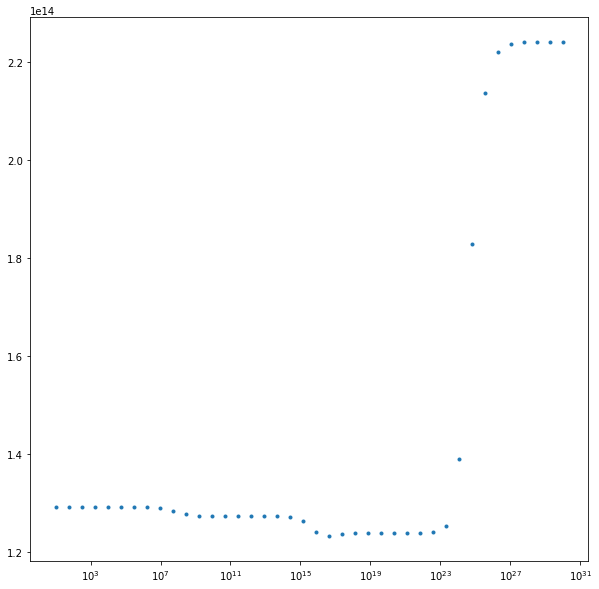

In [17]:
# Plot the l2_penalty values in the x axis and the cross-validation error in the y axis.
# Using plt.xscale('log') will make your plot more intuitive.
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure(figsize=(10,10))
plt.xscale('log')
plt.yscale('linear')
plt.plot(np.logspace(1, 30, num=40),errors,'.')
plt.show()
#look at the sweet spot (lamda=1e3)

In [18]:
print("best value for L2 penality is: " , best_lamda)
print("the smallest error is: ", minimum)

best value for L2 penality is:  4.124626382901365e+16
the smallest error is:  123211603470977.95


### Test Model

In [19]:
model = Ridge(alpha=4e16, fit_intercept=True) 
model.fit(X_train_valid_poly, y_train_valid)
rss_train = get_residual_sum_of_squares(model, X_train_valid_poly, y_train_valid)

X_test_poly = polynomial_dataframe(X_test, 15)
rss_test = get_residual_sum_of_squares(model, X_test_poly, y_test)
print("Training Error(RSS): ", rss_train)
print("Test Error(RSS): ", rss_test)
print("Training Error(RMSE): ", np.sqrt(rss_train / len(y_train_valid)))
print("Test Error(RMSE): ", np.sqrt(rss_test) / len(y_test))

from sklearn.metrics import r2_score
print("Training (R2): ", r2_score(y_train_valid, model.predict(X_train_valid_poly)))
print("Test (R2): ", r2_score(y_test, model.predict(X_test_poly)))

Training Error(RSS):  1212812240824296.0
Test Error(RSS):  138184129141792.22
Training Error(RMSE):  249704.18371500698
Test Error(RMSE):  5437.1760262489515
Training (R2):  0.5398337843908345
Test (R2):  0.501699013549187


There is no overfitting because the R2 on train and test data are similar

In [20]:
# no regularization
model = Ridge(alpha=0, fit_intercept=True) 
model.fit(X_train_valid_poly, y_train_valid)
rss_train = get_residual_sum_of_squares(model, X_train_valid_poly, y_train_valid)

X_test_poly = polynomial_dataframe(X_test, 15)
rss_test = get_residual_sum_of_squares(model, X_test_poly, y_test)
print("Training Error(RSS): ", rss_train)
print("Test Error(RSS): ", rss_test)
print("Training Error(RMSE): ", np.sqrt(rss_train / len(y_train_valid)))
print("Test Error(RMSE): ", np.sqrt(rss_test) / len(y_test))

from sklearn.metrics import r2_score
print("Training (R2): ", r2_score(y_train_valid, model.predict(X_train_valid_poly)))
print("Test (R2): ", r2_score(y_test, model.predict(X_test_poly)))

Training Error(RSS):  1198359485237142.0
Test Error(RSS):  135191847397283.25
Training Error(RMSE):  248211.89596864965
Test Error(RMSE):  5377.984692478932
Training (R2):  0.5453174607751896
Test (R2):  0.5124893767717071
